<a href="https://colab.research.google.com/github/afrarafeeqa2004/machine-learning/blob/main/priceforecastingrandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
data = data[['Close']]

/tmp/ipython-input-3927808281.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data['Lag3'] = data['Close'].shift(3)

In [ ]:
data = data.dropna()

In [ ]:
X = data[['Lag1', 'Lag2', 'Lag3']]
y = data['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print("---- Random Forest Performance ----")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

---- Random Forest Performance ----
MAE: 7.491626770626851
RMSE: 10.318124115812745
R²: 0.09725146584026978


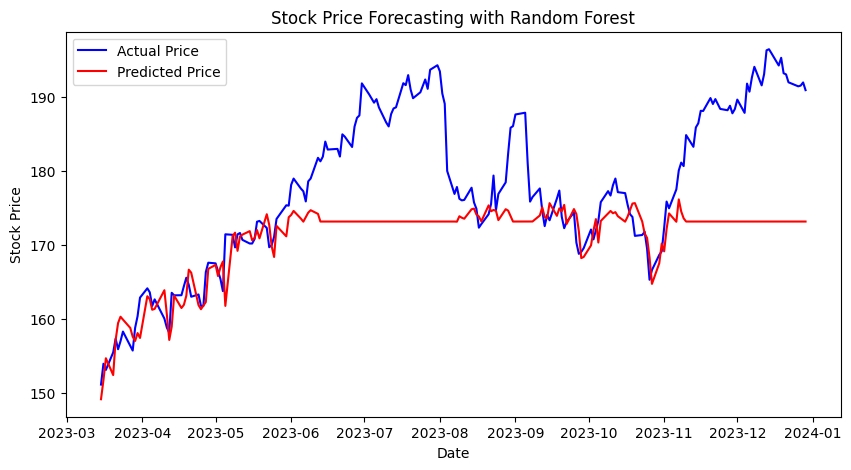

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.index, y_test, label="Actual Price", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted Price", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Forecasting with Random Forest")
plt.legend()
plt.show()